In [1]:
# ==========================================
# 1. Importar librerías necesarias
# ==========================================
import os
import json
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [ ]:
# ==========================================
# 2. Configurar rutas y cargar metadatos
# ==========================================
# Ruta datos
IMG_DIR = r"C:\Users\GMADRO04\Documents\PROYECTOML\processed_data\defectuosas"
METADATA_PATH = os.path.join(IMG_DIR, "metadata.json")

with open(METADATA_PATH, 'r') as f:
    metadata = json.load(f)


In [3]:
# ==========================================
# 3. Función para obtener histograma RGB
# ==========================================
def get_rgb_histogram(image_path, bins=32):
    image = Image.open(image_path).convert('RGB')
    image_array = np.array(image)
    histogram = []
    for channel in range(3):  # R, G, B
        hist, _ = np.histogram(image_array[:, :, channel], bins=bins, range=(0, 256), density=True)
        histogram.extend(hist)
    return histogram


In [5]:
# ==========================================
# 4. Procesar imágenes con sus histogramas
# ==========================================
histograms = []
labels = []
file_names = []

for item in metadata:
    img_file = item["img_file"]
    defect_type = item["json_data"].get("defect_type", "Unknown")  # Si no hay tipo, queda como Unknown
    img_path = os.path.join(IMG_DIR, img_file)

    if os.path.exists(img_path):
        hist = get_rgb_histogram(img_path)
        histograms.append(hist)
        labels.append(defect_type)
        file_names.append(img_file)

# Convertir a DataFrame
df_hist = pd.DataFrame(histograms)
df_hist['defect_type'] = labels
df_hist['file'] = file_names

df_hist.head()

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,defect_type,file
0,0.0,0.0,0.000002,0.000000,0.000008,0.000042,0.000131,0.000708,0.002413,0.006233,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,Unknown,3_blade_1_15_with_labeldata_Blade_1_1_1_10_d78...
1,0.0,0.0,0.000000,0.000002,0.000002,0.000063,0.000427,0.001929,0.005671,0.015500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,Unknown,3_blade_1_15_with_labeldata_Blade_1_1_1_11_9e2...
2,0.0,0.0,0.000000,0.000006,0.000013,0.000079,0.000300,0.001035,0.002777,0.007404,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,Unknown,3_blade_1_15_with_labeldata_Blade_1_1_1_12_848...
3,0.0,0.0,0.000000,0.000000,0.000031,0.000169,0.001104,0.002742,0.005431,0.012492,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,Unknown,3_blade_1_15_with_labeldata_Blade_1_1_1_13_116...
4,0.0,0.0,0.000000,0.000002,0.000004,0.000063,0.000365,0.000783,0.000988,0.001521,...,0.010285,0.005535,0.013867,0.030285,0.043946,0.00045,0.000094,0.000021,Unknown,3_blade_1_15_with_labeldata_Blade_10_3_3_0_a9c...


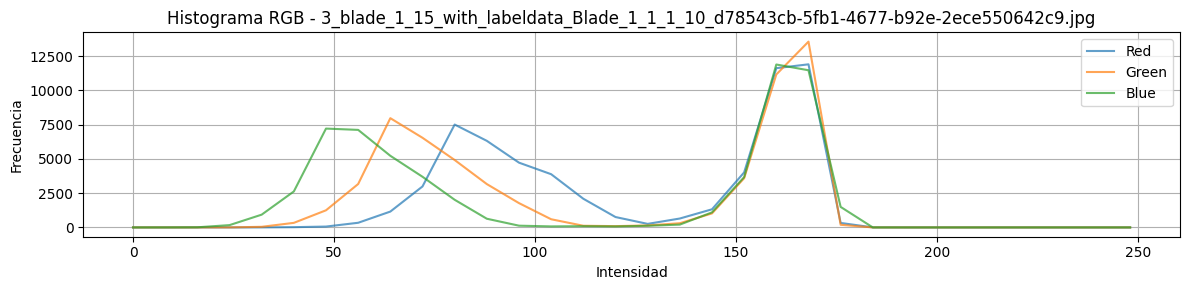

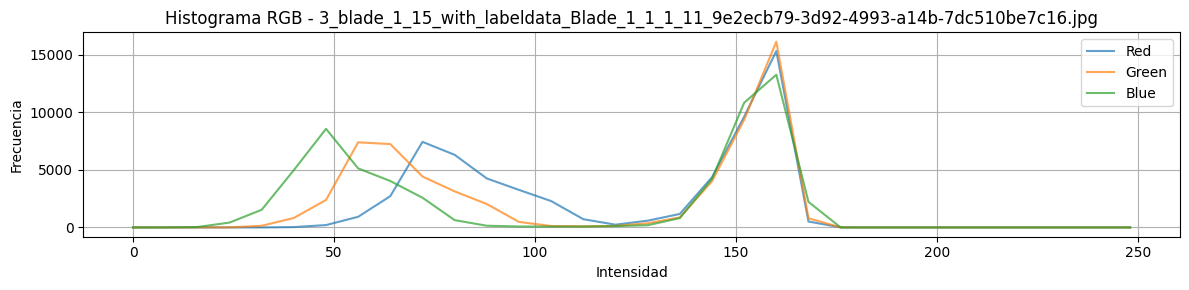

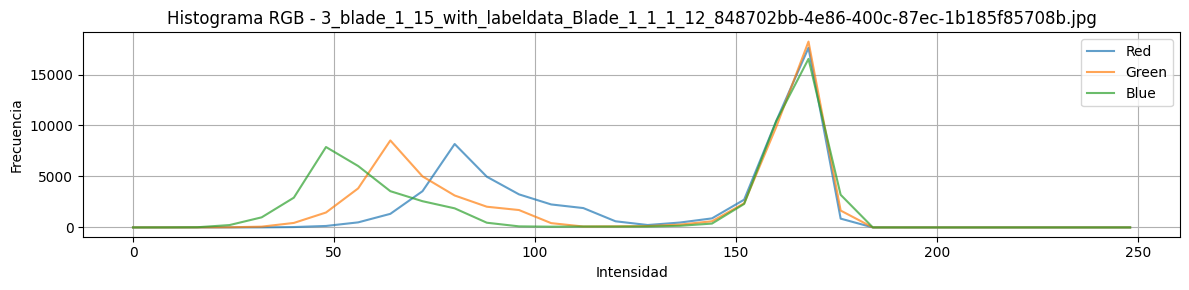

In [7]:
# ==========================================
# 5. Visualizar algunos histogramas RGB
# ==========================================
def plot_histogram_row(img_path):
    image = Image.open(img_path).convert("RGB")
    image_array = np.array(image)

    plt.figure(figsize=(12, 3))
    for i, color in enumerate(['Red', 'Green', 'Blue']):
        hist, bins = np.histogram(image_array[:, :, i], bins=32, range=(0, 256))
        plt.plot(bins[:-1], hist, label=f'{color}', alpha=0.7)
    
    plt.title(f"Histograma RGB - {os.path.basename(img_path)}")
    plt.xlabel("Intensidad")
    plt.ylabel("Frecuencia")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Probar con 3 imágenes
for i in range(3):
    path = os.path.join(IMG_DIR, df_hist['file'].iloc[i])
    plot_histogram_row(path)

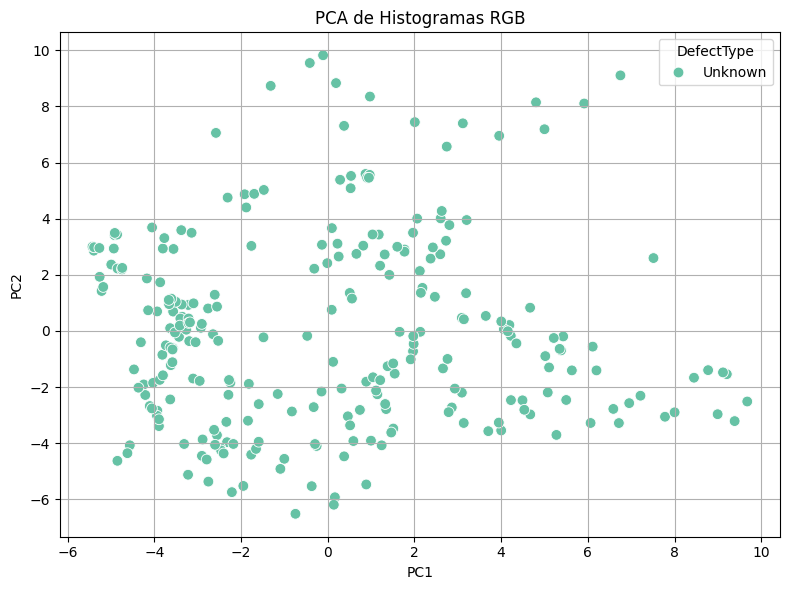

In [8]:
# ==========================================
# 6. Proyección PCA para visualizar clústeres
# ==========================================
X = df_hist.drop(columns=['defect_type', 'file'])
y = df_hist['defect_type']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'DefectType': y
})

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='DefectType', palette='Set2', s=60)
plt.title("PCA de Histogramas RGB")
plt.grid(True)
plt.tight_layout()
plt.show()
